In [1]:
import torch
import framework.nn_fw as nn 
import framework.train_test_fw as tt
from visualization import *
from tqdm.notebook import tqdm
from generate_data import *

torch.set_grad_enabled(False)  # explicitly enforces expectation for the task 

if torch.cuda.is_available():
    device = torch.device('cuda')
    print("Using cuda device for all tensor calculations.")
else:
    device = torch.device('cpu')
    print("Using cpu device for all tensor calculations.")

Using cpu device for all tensor calculations.


Generate Data as instructed in task

In [2]:
data = generate_disc_set(2_000, split=.5, one_hot_labels=False)

Checking wether dataset is created correctly

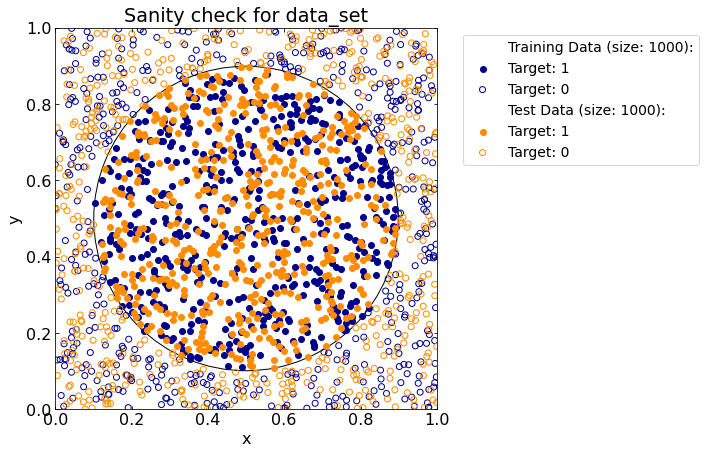

In [3]:
plot_data(data)

In [ ]:
model = nn.Sequential
architecture = (nn.Linear(2, 25), nn.Tanh(), nn.Linear(25, 25), nn.ReLU(), nn.Linear(25, 1), nn.ReLU())

In [ ]:
trial_name = "Tanh"
nb_trials = 50
epochs = 50_000
batch_size = 100
learning_rate = 0.0001

mean, std = tt.run_analysis(model, architecture, data, nb_trials, epochs, device, batch_size=batch_size, lr = learning_rate, name = trial_name)

In [ ]:
trial_name = "Tanh"
epochs = 50_000
best_run = nn.load_model("best_model_" + trial_name + '_epochs_{}'.format(epochs))
best_run.to_device(device)
output = best_run(data[2].to(device))
errors = tt.compute_nb_errors(output, data[3].to(device))
accuracy = 1 - errors/(data[2].shape[0])

print("The best performing model from the previous analysis achieves: \n")
print("Test accuracy: ({:.3f}%)".format(100. * accuracy), "   |     Total number of errors {}".format(errors))